<a href="https://colab.research.google.com/github/mohd-faizy/CAREER-TRACK-Data-Scientist-with-Python/blob/main/05_MLB_No_Hitters_and_the_Exponential_Distribution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

--- 
<strong> 
    <h1 align='center'>MLB No-Hitters and the Exponential Distribution</h1> 
</strong>

---

The following dataset was taken from the Datacamp course, Statistical Thinking in Python. I’ve expanded the analysis and hopefully added new insights into the data.

There have been 215 Major League Baseball no-hitters between 1901 and 2015. In this analysis we will determine if no-hitters are exponentially distributed, take bootstrap samples, and determine summary statistics and probabilities.

The exponential distribution is the probability distribution of the time between events in a process where events occur continuously and independently at a constant average rate.

Numpy has two functions that we will use in this analysis, np.random.poisson and np.random.exponential. The Poisson distribution deals with the number of occurrences in a fixed period of time, and the exponential distribution deals with the time between occurrences.

First lets load the data into a Numpy array , compute some summary statistics, plot a histogram, and determine if no-hitters are indeed exponentially distributed.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
nohitter_times = np.array(
        [843, 1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,
        715,  966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,
        104, 1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,
        166,   96,  702,   23,  524,   26,  299,   59,   39,   12,    2,
        308, 1114,  813,  887,  645, 2088,   42, 2090,   11,  886, 1665,
       1084, 2900, 2432,  750, 4021, 1070, 1765, 1322,   26,  548, 1525,
         77, 2181, 2752,  127, 2147,  211,   41, 1575,  151,  479,  697,
        557, 2267,  542,  392,   73,  603,  233,  255,  528,  397, 1529,
       1023, 1194,  462,  583,   37,  943,  996,  480, 1497,  717,  224,
        219, 1531,  498,   44,  288,  267,  600,   52,  269, 1086,  386,
        176, 2199,  216,   54,  675, 1243,  463,  650,  171,  327,  110,
        774,  509,    8,  197,  136,   12, 1124,   64,  380,  811,  232,
        192,  731,  715,  226,  605,  539, 1491,  323,  240,  179,  702,
        156,   82, 1397,  354,  778,  603, 1001,  385,  986,  203,  149,
        576,  445,  180, 1403,  252,  675, 1351, 2983, 1568,   45,  899,
       3260, 1025,   31,  100, 2055, 4043,   79,  238, 3931, 2351,  595,
        110,  215,    0,  563,  206,  660,  242,  577,  179,  157,  192,
        192, 1848,  792, 1693,   55,  388,  225, 1134, 1172, 1555,   31,
       1582, 1044,  378, 1687, 2915,  280,  765, 2819,  511, 1521,  745,
       2491,  580, 2072, 6450,  578,  745, 1075, 1103, 1549, 1520,  138,
       1202,  296,  277,  351,  391,  950,  459,   62, 1056, 1128,  139,
        420,   87,   71,  814,  603, 1349,  162, 1027,  783,  326,  101,
        876,  381,  905,  156,  419,  239,  119,  129,  467])

## __Exponential Distribution__

The array count is 251
The mean is 763.0358565737051
The median is 524.0
The standard deviation is 841.3905552378098


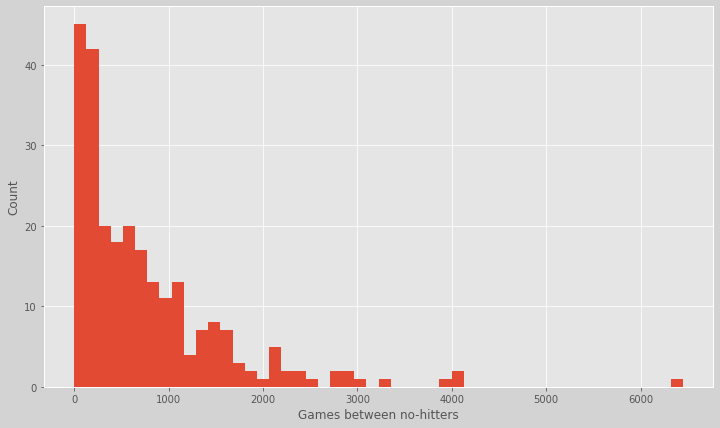

In [3]:
#Print summary statistics
print('The array count is',len(nohitter_times))
print('The mean is',np.mean(nohitter_times))
print('The median is',np.median(nohitter_times))
print('The standard deviation is',np.std(nohitter_times))
 
# Plot Style
plt.style.use('ggplot')

# Plot a histogram and label axes
_ = plt.figure(figsize=(12, 7), facecolor='lightgray') 
_ = plt.hist(nohitter_times, bins=50)
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('Count')
plt.show()

From above, **one interesting observation is the standard deviation is much greater then the mean**. This means the **data is highly dispersed**, as we will see in more detail below as we determine if the data is exponentially distributed

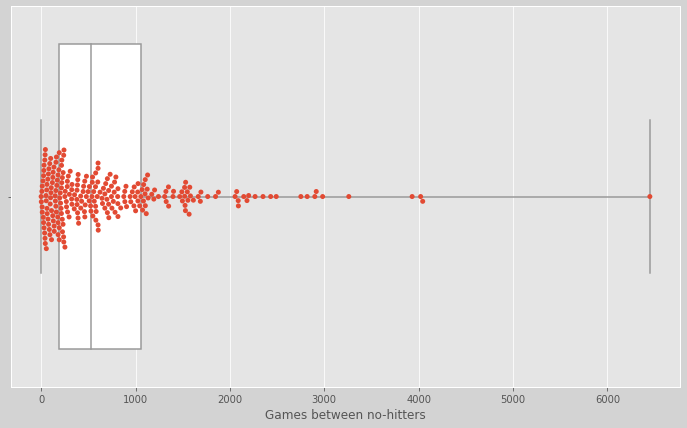

In [4]:
# Plot Style
plt.style.use('ggplot')

# Plot Size
plt.figure(figsize=(12, 7), facecolor='lightgray')

# Plot a combined boxplot and swarmplot
sns.boxplot(x = nohitter_times,whis=np.inf,color='white')
sns.swarmplot(x = nohitter_times)
 
# Label the axes
_ = plt.xlabel('Games between no-hitters')
plt.show()

From above, Looking at the graphs, no-hitters appear to be exponentially distributed, but lets do a bit more analysis to be absolutely sure.

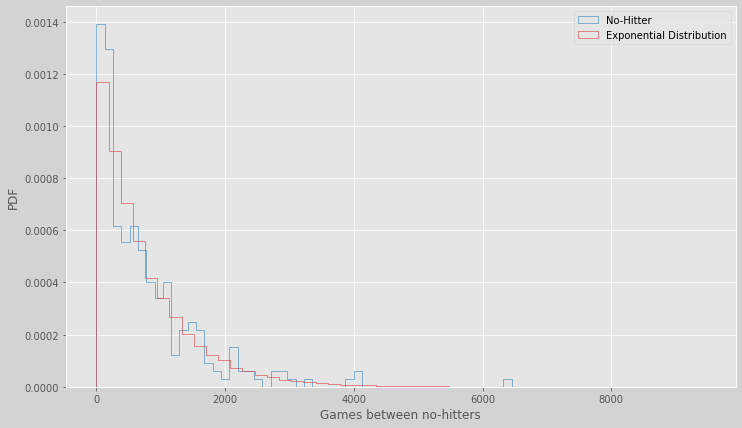

In [5]:
# Plot Style
plt.style.use('ggplot')

# Plot Size
plt.figure(figsize=(12, 7), facecolor='lightgray')

#Determine if the time between no-hitters is exponentialy distributed
plt.hist(nohitter_times, bins=50, density=True, histtype='step',color='tab:blue',label='No-Hitter')
 
# Compute mean no-hitter time: tau
tau = np.mean(nohitter_times)
 
# Draw out of an exponential distribution with parameter tau: inter_nohitter_time
inter_nohitter_times = np.random.exponential(tau, 100_000)

# Plot the PDF and label axes
_ = plt.hist(inter_nohitter_times, bins=50, density=True, histtype='step',color='tab:red',label='Exponential Distribution')
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('PDF')
_ = plt.legend()
plt.show()

From above, Here we create an array of **random numbers** using the `np.random.exponential` function and **compare it against the array of no-hitters.** ***We set the density of the histogram to true so we can see the results as a probability distribution.***

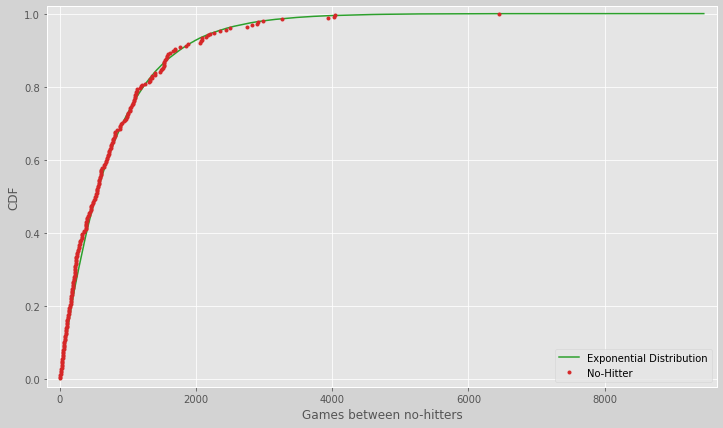

In [6]:
# Plot Style
plt.style.use('ggplot')

# Plot Size
plt.figure(figsize=(12, 7), facecolor='lightgray')

# defining the EDCF func
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
 
    # x-data for the ECDF: x
    x = np.sort(data)
 
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
 
    return x, y

# Create an ECDF from real data: x, y
x, y = ecdf(nohitter_times)
 
# Create a CDF from theoretical samples: x_theor, y_theor
x_theor, y_theor = ecdf(inter_nohitter_times)
 
# Overlay the plots
_ = plt.plot(x_theor, y_theor,color='tab:green',label='Exponential Distribution')
_ = plt.plot(x, y, marker='.', linestyle='none',color='tab:red',label='No-Hitter')
 
# Margins and axis labels
_ = plt.margins(.02)
_ = plt.xlabel('Games between no-hitters')
_ = plt.ylabel('CDF')
_ = plt.legend()
plt.show()

Lets look at a cumulative distribution function to see if this gives a more defined look to see if the process is indeed exponentially distributed

## __Bootstrap Samples__

Now lets take bootstrap samples of the data to determine the confidence intervals. Here we are going to take a random sample, determine the mean, save the mean to the array bs_replicates, and repeat this `10,000` times.


We will then plot a histogram and determine the confidence interval.

95% confidence interval of the bootstrap replicates: [662.61743028 871.66613546] games


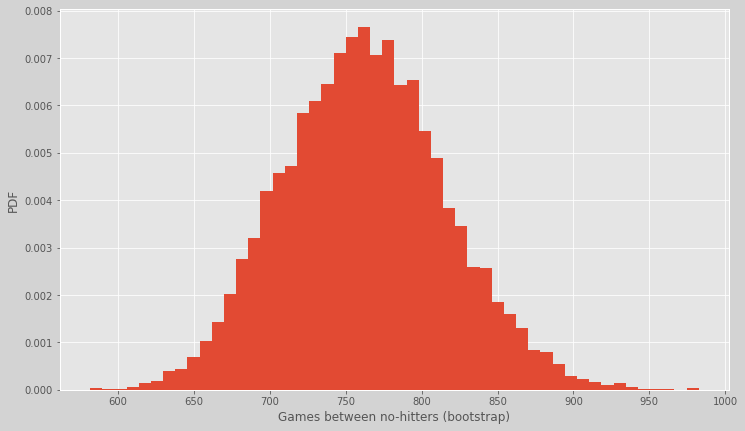

In [7]:
def bootstrap_replicate_1d(data, func):
    """Generate bootstrap replicate of 1D data."""
    bs_sample = np.random.choice(data, len(data))
    return func(bs_sample)

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""
 
    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(shape=size)
 
    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)
 
    return bs_replicates

# Plot Style
plt.style.use('ggplot')

# Plot Size
plt.figure(figsize=(12, 7), facecolor='lightgray')

# Draw bootstrap replicates of the mean no-hitter time (equal to tau): bs_replicates
bs_replicates = draw_bs_reps(nohitter_times, np.mean,10_000)
 
# Compute the 95% confidence interval: conf_int
conf_int_bs = np.percentile(bs_replicates,[2.5,97.5])
conf_int_real = np.percentile(nohitter_times,[2.5,97.5])
 
# Print the confidence interval
print('95% confidence interval of the bootstrap replicates:',conf_int_bs, 'games')
 
# Plot the histogram of the replicates
_ = plt.hist(bs_replicates, bins=50, density=True)
_ = plt.xlabel('Games between no-hitters (bootstrap)')
_ = plt.ylabel('PDF')
plt.show()

## __Dead Ball vs. Live Ball Eras__

n 1920 there were several rule changes in baseball that contributed to a rise in offensive numbers, the era before 1920 is known as the dead ball era, and the subsequent years is known as the live ball era.

Now that we know the process is exponentially distributed, lets find out if there is a statistical significance in the mean between the dead ball and live ball eras.

First let’s create two arrays, one for the dead ball era and one for the live ball era.

In [8]:
nht_dead = np.array([  -1,  894,   10,  130,    1,  934,   29,    6,  485,  254,  372,
         81,  191,  355,  180,  286,   47,  269,  361,  173,  246,  492,
        462, 1319,   58,  297,   31, 2970,  640,  237,  434,  570,   77,
        271,  563, 3365,   89,    0,  379,  221,  479,  367,  628,  843,
       1613, 1101,  215,  684,  814,  278,  324,  161,  219,  545,  715,
        966,  624,   29,  450,  107,   20,   91, 1325,  124, 1468,  104,
       1309,  429,   62, 1878, 1104,  123,  251,   93,  188,  983,  166,
         96,  702,   23,  524,   26,  299,   59,   39,   12,    2,  308,
       1114,  813,  887])
 
nht_live = np.array([ 645, 2088,   42, 2090,   11,  886, 1665, 1084, 2900, 2432,  750,
       4021, 1070, 1765, 1322,   26,  548, 1525,   77, 2181, 2752,  127,
       2147,  211,   41, 1575,  151,  479,  697,  557, 2267,  542,  392,
         73,  603,  233,  255,  528,  397, 1529, 1023, 1194,  462,  583,
         37,  943,  996,  480, 1497,  717,  224,  219, 1531,  498,   44,
        288,  267,  600,   52,  269, 1086,  386,  176, 2199,  216,   54,
        675, 1243,  463,  650,  171,  327,  110,  774,  509,    8,  197,
        136,   12, 1124,   64,  380,  811,  232,  192,  731,  715,  226,
        605,  539, 1491,  323,  240,  179,  702,  156,   82, 1397,  354,
        778,  603, 1001,  385,  986,  203,  149,  576,  445,  180, 1403,
        252,  675, 1351, 2983, 1568,   45,  899, 3260, 1025,   31,  100,
       2055, 4043,   79,  238, 3931, 2351,  595,  110,  215,    0,  563,
        206,  660,  242,  577,  179,  157,  192,  192, 1848,  792, 1693,
         55,  388,  225, 1134, 1172, 1555,   31, 1582, 1044,  378, 1687,
       2915,  280,  765, 2819,  511, 1521,  745, 2491,  580, 2072, 6450,
        578,  745, 1075, 1103, 1549, 1520,  138, 1202,  296,  277,  351,
        391,  950,  459,   62, 1056, 1128,  139,  420,   87,   71,  814,
        603, 1349,  162, 1027,  783,  326,  101,  876,  381,  905,  156,
        419,  239,  119,  129,  467])

Now let’s create a couple of useful functions that we need and determine the difference in means between the no-hitter times (nht) of the **live ball** era vs the **dead ball** era.

In [9]:
# func_1
def diff_of_means(data_1, data_2):
    """Difference in means of two arrays."""
 
    # The difference of means of data_1, data_2: diff
    diff = np.mean(data_1) - np.mean(data_2)
 
    return diff

# func_2
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""
 
    # Concatenate the data sets: data
    data = np.concatenate((data1,data2))
 
    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)
 
    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]
 
    return perm_sample_1, perm_sample_2

# func_3
def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""
 
    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)
 
    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1,data_2)
         
        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)
         
    return perm_replicates


# Compute the observed difference in mean inter-no-hitter times: nht_diff_obs
print('The mean no hitter time of the dead ball error is ' + str(np.mean(nht_dead)))
print('The mean no hitter time of the live ball error is ' + str(np.mean(nht_live)))
 
nht_diff_obs = diff_of_means(nht_live,nht_dead)
 
print('The difference in mean no hitter times (nht_diff_obs) is ' + str(nht_diff_obs))

The mean no hitter time of the dead ball error is 478.7032967032967
The mean no hitter time of the live ball error is 823.7044334975369
The difference in mean no hitter times (nht_diff_obs) is 345.0011367942402


The mean of **345 games appears to be quite significant between the dead ball and live ball eras**. To determine if it’s significantly different, we will create bootstrap samples mixing the dead ball and live eras together, repeatedly determine the means, and compare this against our mean of 345.

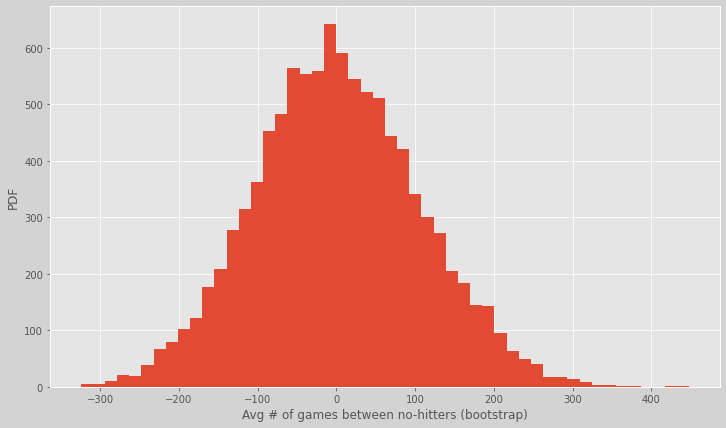

In [10]:
# Acquire 10,000 permutation replicates of difference in mean no-hitter time: perm_replicates
perm_replicates = draw_perm_reps(nht_dead,nht_live,diff_of_means,size=10_000)

# Plot Style
plt.style.use('ggplot')

# Plot the graph
_ = plt.figure(figsize=(12, 7), facecolor='lightgray')
_ = plt.hist(perm_replicates,bins=50)
_ = plt.xlabel('Avg # of games between no-hitters (bootstrap)')
_ = plt.ylabel('PDF')
plt.show()

>Looking at the above histogram, we can see the average difference between our bootstrap samples is 0 games. **But is our mean of 345 games statistically significant?** 

To answer this question, **we need to find the probability from our distribution samples where the mean is greater then or equal to 345 games.** 

**To do this, we use a two tail p-value assessment.**

In [11]:
perm_replicates_less_than = (perm_replicates[perm_replicates >= nht_diff_obs])
 
# Compute and print the p-value: p
p1 = np.sum(perm_replicates >= nht_diff_obs) / len(perm_replicates)
p2 = np.sum(perm_replicates <= (nht_diff_obs * -1)) / len(perm_replicates)
 
print('p-val =', p1 + p2)

p-val = 0.0009


Here we get a probability of .0001 that the average difference in means between the dead ball and live ball eras is greater then or equal to 345 games. This equates to 1 out of the 10,000 bootstrap samples had a mean of 345 games or greater. We can conclude that the rules changes introduced in 1920 did have a statistical affect on no-hitter times.

## __Was 1990 and 2015 anomalous?__

In 1990 and 2015 there were 7 no-hitters during the season. Given there have been 215 no-hitters across 115 seasons, what is the probability of having 7 no-hitters in a season.

Here we will be using the numpy function np.random.poisson. Before we were using the np.random.exponential function as we were dealing with the time (games) between no-hitters. Now we will be working with the average number of no-hitters in a season.

We create a Poisson distribution using the mean of 251/115, the number of no-hitters divided by the number of seasons, and then determine the number of processes that are greater then or equal to 7.

In [12]:
# Draw 10,000 samples out of Poisson distribution: n_nohitters
n_nohitters = np.random.poisson(251/115, size=10000)
 
# Compute number of samples that are seven or greater: n_large
n_large = np.sum(n_nohitters >= 7)
print(n_large)
 
# Compute probability of getting seven or more: p_large
p_large = n_large / 10000
 
# Print the result
print('Probability of seven or more no-hitters:', p_large)

93
Probability of seven or more no-hitters: 0.0093


Executing the above code results in 0.0069. There is less then 1% chance of 7 or more no-hitters occurring in a season.

The chance of 0 no-hitters occurring in a season is 0.11419, or 11%.

## **Conclusion**

In this analysis we have accomplished quite a bit.

We first determined that no-hitters fit the exponential distribution by using the np.random.exponential function and looking at a probability distribution function.

We then created bootstrap samples and determined the 95% confidence interval of the mean.

Next we used our bootstrap sampling knowledge to see if there is a significant difference in the mean time between the dead ball and live ball eras. We found a probability of .0001, or 1 out of our 10,000 bootstrap samples had an extreme as the actual difference between the dead ball and live ball eras.

And finally we used the np.random.poisson function to determine the probability of having seven or more no-hitters in a season, which was less then 1%.

<p align='center'> 
    <a href="https://twitter.com/F4izy"> 
        <img src="https://th.bing.com/th/id/OIP.FCKMemzqNplY37Jwi0Yk3AHaGl?w=233&h=207&c=7&o=5&pid=1.7" width=50px 
            height=50px> 
    </a> 
    <a href="https://www.linkedin.com/in/mohd-faizy/"> 
        <img src='https://th.bing.com/th/id/OIP.idrBN-LfvMIZl370Vb65SgHaHa?pid=Api&rs=1' width=50px height=50px> 
    </a> 
</p>